# **FINAL PROJECT DIBIMBING**
Saya menggunakan K-Means Clustering dan Unsupervised Learning
untuk meningkatkan transaksi di suatu pusat belanja

# **Unsupervised  Quick Introduction**
**Unsupervised Learning** is a machine learning technique in which the users do not need to supervise the model. Instead, it allows the model to work on its own to discover patterns and information that was previously undetected.

In [1]:
# import EDA library
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# import sklearn library
import sklearn.datasets as datasets
import sklearn.preprocessing as preprocessing
import sklearn.decomposition as decomposition
import sklearn.cluster as cluster
from sklearn.cluster import KMeans

In [4]:
# install library
!pip install scikit-plot

In [5]:
# import graph library
import matplotlib.pyplot as plt
import scikitplot as skplt

# **Load data**


In [6]:
# mounted google drive
import google.colab as gc
gc.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# change folder
%cd '/content/drive/MyDrive/Class-20210420-01/Muhammad Kanzia_Day 22/cc'

/content/drive/.shortcut-targets-by-id/1Atr52kQtpKI__DG99japz14wr8jXJe6S/Class-20210420-01/Muhammad Kanzia_Day 22/cc


In [8]:
# check file in folder
!ls

 archive.zip			 GlobalTemperatures.csv
'archive.zip (Unzipped Files)'	 Mall_Customers.csv
'GlobalTemperatures (1).csv'


In [9]:
# read the data
df = pd.read_csv('Mall_Customers.csv')
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


# **Exploratory Data Analysis**

In [10]:
#Getting to know the shape of data
print(df.shape)

(200, 5)


In [11]:
# simple data checking - get dataframe general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
print(df.columns)

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [13]:
# rename column name
df = df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Spending', 'Genre':'Sex'})
df

,CustomerID,Sex,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [15]:
# assign variable for column in numeric type
numeric_column = ['Age', 'Income', 'Spending']

In [16]:
# check simple statistic of the numeric value
df[numeric_column].describe()

,Age,Income,Spending
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [17]:
# check standard missing value - multiple column
df[df.isnull().any(axis=1)]

,CustomerID,Sex,Age,Income,Spending


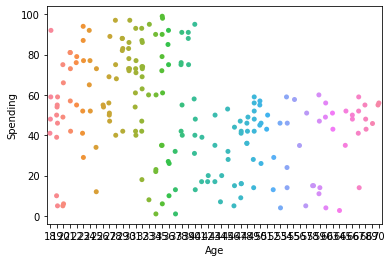

In [31]:
# Some visualization
sns.stripplot(x='Age', y='Spending',data=df)

Datanya sangat tersebar dari beragam umur, tetapi spending paling banyak terlihat di kelompok remaja

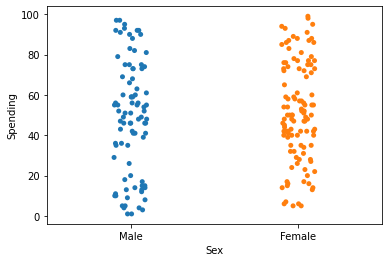

In [23]:
#Visualization 2
sns.stripplot(x='Sex', y='Spending', data=df)

Tidak bisa juga menentukan apakah perempuan lebih banyak belanja daripada laki-laki karena hampir sama banyak

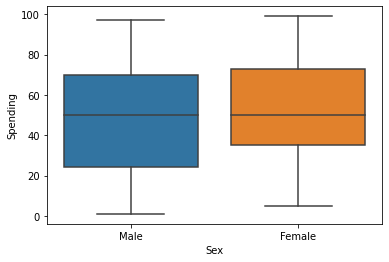

In [33]:
#Visualization - 3
sns.boxplot( x= 'Sex', y='Spending', data = df )

Melalui boxplot dapat dilihat bahwa laki-laki melakukan transaksi lebih banyak daripada perempuan, namun lebih murah

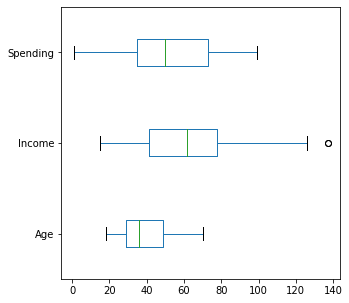

In [34]:
# check outlier using boxplot
df.boxplot(column=numeric_column,fontsize=10,rot=0,grid=False,figsize=(5,5),vert=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


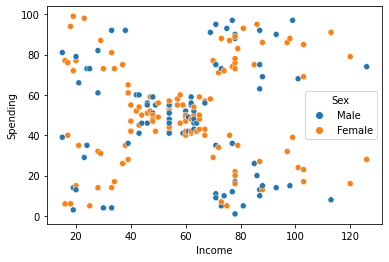

In [ ]:
sns.scatterplot(df['Income'],df['Spending'],hue=df['Sex'])

Melalui scatterplot, datanya juga tersebar antara income dan spending laki-laki maupun perempuan

In [35]:
# get IQR for each numeric column
Q1 = df[numeric_column].quantile(0.25)
Q3 = df[numeric_column].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 Age         28.75
Income      41.50
Spending    34.75
Name: 0.25, dtype: float64

Q3:
 Age         49.0
Income      78.0
Spending    73.0
Name: 0.75, dtype: float64

IQR:
 Age         20.25
Income      36.50
Spending    38.25
dtype: float64

Min:
 Age         -1.625
Income     -13.250
Spending   -22.625
dtype: float64

Max:
 Age          79.375
Income      132.750
Spending    130.375
dtype: float64


In [36]:
# remove outlier
df = df.copy()
for x in numeric_column:
  filter_min = df[x]<boxplot_min[x]
  filter_max = df[x]>boxplot_max[x]
  df = df[~(
    filter_min|filter_max
    )]

In [37]:
df.shape

(198, 5)

Terdapat 2 data outlier

In [38]:
# check simple statistic of the numeric value
df[numeric_column].describe()

,Age,Income,Spending
count,198.000000,198.000000,198.000000
mean,38.929293,59.787879,50.196970
std,14.016852,25.237259,25.746846
min,18.000000,15.000000,1.000000
25%,28.250000,40.500000,35.000000
50%,36.000000,61.000000,50.000000
75%,49.000000,77.750000,72.750000
max,70.000000,126.000000,99.000000


# **Add new column**

In [39]:
# add new column from list
potential = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
df['is_potential'] = potential
df

,CustomerID,Sex,Age,Income,Spending,is_potential
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
193,194,Female,38,113,91,0
194,195,Female,47,120,16,0
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0


In [40]:
final_feature_column = ['Income', 'Spending']
target_column = ['is_potential']

In [41]:
# prepare the data to numpy array
final_feature_array = df[final_feature_column].to_numpy()
target_array = df[target_column].to_numpy()

In [42]:
print('shape of final feature:',final_feature_array.shape)
print('shape of target:',target_array.shape)

shape of final feature: (198, 2)
shape of target: (198, 1)


# **PCA**

In [43]:
# load the algorithm
pca_model = decomposition.PCA(n_components=2)
#n component direduce mnjadi x kolom, kalo disini --arbitrary-- decidenya test jadi 2 kolom

In [44]:
# train the data and transform
pca_feature_array = pca_model.fit_transform(final_feature_array)

In [ ]:
# check the shape of the result
pca_feature_array.shape

(198, 2)

In [58]:
# add new name for the new column
pca_column = ['pca column 1','pca column 2']

In [ ]:
# transform to dataframe
pca_feature_df = pd.DataFrame(pca_feature_array,columns=pca_column)
pca_feature_df['is_potential'] = target_array

In [ ]:
# check the resulted data
pca_feature_df.head(5)

,pca column 1,pca column 2,is_potential
0,21.256142,-40.981735,0
1,-19.604123,-50.699696,0
2,53.129256,-32.373332,0
3,-15.944049,-48.801312,0
4,19.820519,-39.267389,0


In [ ]:
# check the explained variance
print('explained variance:',pca_model.explained_variance_ratio_)

explained variance: [0.51119244 0.48880756]


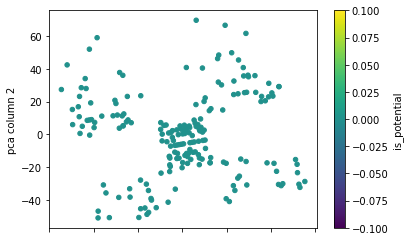

In [ ]:
# show in 2D plot
pca_feature_df.plot.scatter(x='pca column 1',y='pca column 2',c='is_potential',colormap='viridis')

Ternyata hampir semuanya potensial menjadi pelanggan

In [ ]:
# check explained variance for each number of component
for x in range(1,len(final_feature_column)+1):
  pca_model_x = decomposition.PCA(n_components=x)
  pca_feature_array_x = pca_model_x.fit_transform(final_feature_array)
  print('explained variance for {} components: {}'.format(x,np.sum(pca_model_x.explained_variance_ratio_)))

  #biasanya pake/pilih dari 5 komponen pertama untuk mendapatkan number of components yg tepat

explained variance for 1 components: 0.5111924353864143
explained variance for 2 components: 1.0


# **Clustering**

In [47]:
# load the algorithm
cluster_model = cluster.KMeans(n_clusters=5)

In [48]:
# train the data
cluster_array = cluster_model.fit(final_feature_array)

In [49]:
# label result
cluster_label = cluster_model.labels_

In [50]:
cluster_label

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 4,
       3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 4, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0],
      dtype=int32)

In [51]:
# add label to final dataframe
df['cluster'] = cluster_label

In [52]:
# check the resulted data
df.head(5)

,CustomerID,Sex,Age,Income,Spending,is_potential,cluster
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,1
4,5,Female,31,17,40,0,3


Insight: Algoritma itu cuman tool seperti mobil dari A ke B. Tapi bisa untuk berbagai macam cara, misalnya clustering dulu karena bisa jadi klasifikasi kita tidak cocok.


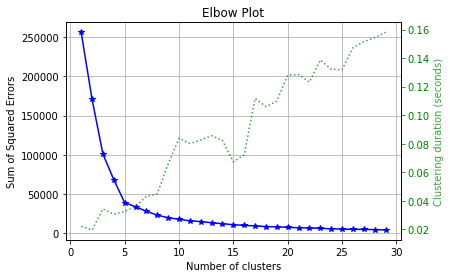

In [60]:
# check using elbow method to define the best cluster
skplt.cluster.plot_elbow_curve(cluster_model, final_feature_array, cluster_ranges=range(1, 30))
plt.show()

#Di plot ini melandai saat cluster 5

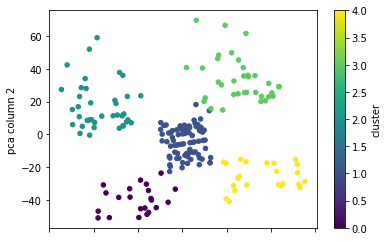

In [59]:
# plot using PCA using the best cluster
best_cluster_model = cluster.KMeans(n_clusters=5)
best_cluster_array = best_cluster_model.fit(final_feature_array)
best_cluster_label = best_cluster_model.labels_
pca_feature_df = pd.DataFrame(pca_feature_array,columns=pca_column)
pca_feature_df['cluster'] = best_cluster_label
pca_feature_df.plot.scatter(x='pca column 1',y='pca column 2',c='cluster',colormap='viridis')

In [56]:
#Apply K-Means algorithm on training dataset.

kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_pred=kmeans.fit_predict(final_feature_array)

# **JUMP HERE IF YOU DONT HAVE TIME**

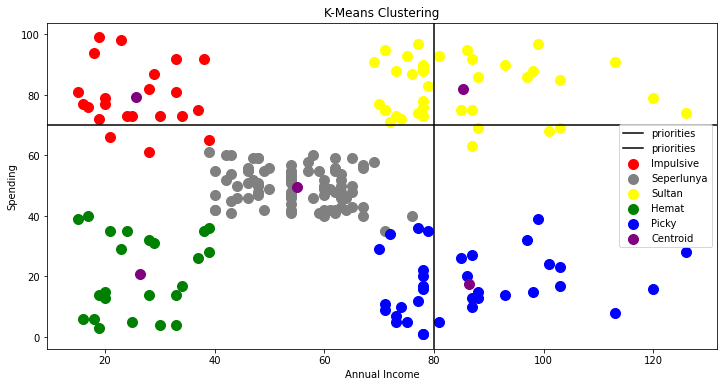

In [92]:
plt.figure(figsize=(12,6))
plt.scatter(final_feature_array[y_pred == 0,0],final_feature_array[y_pred == 0,1],s=100, c='red',label='Impulsive')
plt.scatter(final_feature_array[y_pred == 1,0],final_feature_array[y_pred == 1,1],s=100,c='grey',label='Seperlunya')
plt.scatter(final_feature_array[y_pred == 2,0],final_feature_array[y_pred == 2,1],s=100,c='yellow',label='Sultan')
plt.scatter(final_feature_array[y_pred == 3,0],final_feature_array[y_pred == 3,1],s=100,c='green',label='Hemat')
plt.scatter(final_feature_array[y_pred == 4,0],final_feature_array[y_pred == 4,1],s=100,c='blue',label='Picky')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='purple',label='Centroid')
plt.title("K-Means Clustering")
plt.axvline(x=80, ymin=0, ymax=1,c='black', label='priorities')
plt.axhline(y=70, xmin=0, xmax=1, c='black', label='priorities')
plt.xlabel("Annual Income")
plt.ylabel("Spending")
plt.legend()
plt.show()

# **Conclusion + Follow-up Action Recommendation**

Dapat dilihat bahwa terdapat lima kelompok customer.

Grup 1 (Merah) merupakan customer dengan Spending besar namun Income kecil, yang selanjutnya kita sebut sebagai (**Customer impulsif**)

- **Customer impulsif** dapat kita stimulasi dengan 
  1. Meningkatkan promosi disaat **event promosi bulanan atau impromptu/perayaan tertentu** seperti **5-5 sale, 6-6 sale, ulang tahun ecommerce**, karena cenderung tertarik melihat promo besar-besaran dan 
  2. Menawarkan **paket membership** sebagai apresiasi serta menjaga tingginya angka Spending



Grup 2 (Abu-abu) merupakan customer dengan Spending sedang dan Income sedang,
selanjutnya kita sebut sebagai (**Customer seperlunya**)

- **Customer seperlunya** dapat kita stimulasi dengan 
  1. Menurunkan atau memberikan **diskon barang**, karena spending mereka sudah cukup besar dan menjaga agar tidak menurun, serta
  2. Memberikan **voucher belanja** dengan minimum tertentu, tujuannya untuk menaikkan angka Spending

Grup 3 (Kuning) merupakan customer dengan Spending besar dan Income besar,
selanjutnya kita sebut sebagai (**Customer sultan**)

- **Customer sultan** dapat kita stimulasi dengan 
  1. Menawarkan **paket Membership** bernama-nama mewah seperti Platinum, Gold dengan **hadiah-hadiah menarik (seperti voucher belanja atau Buy 1Get 1)**. Alasannya karena Spending mereka besar, Income juga besar dan kita ingin mempertahankan angka itu

Grup 4 (Hijau) merupakan customer dengan Spending kecil dan Income kecil, 
selanjutnya kita sebut sebagai (**Customer hemat**)

- **Customer hemat** dapat kita stimulasi dengan 
  1. Memberikan voucher yang didapatkan setelah melewati minimum belanja tertentu. Hal ini dilakukan agar mereka membeli lebih banyak barang atau Spending mereka naik
  2. Meningkatkan promosi disaat **event promosi bulanan atau impromptu/perayaan tertentu** seperti **5-5 sale, 6-6 sale, ulang tahun ecommerce**, karena cenderung tertarik melihat promo besar-besaran dan 


Grup 5 (Biru) merupakan customer dengan Spending kecil namun Income besar,
selanjutnya kita sebut sebagai (**Customer picky**)

- **Customer picky** dapat kita stimulasi dengan 
  1. Memberikan diskon terhadap produk atau merek tertentu yang biasa mereka beli. Hal ini dikarenakan mereka sebelumnya sudah merasa nyaman dengan merek tersebut dan cenderung membeli lagi. Kita juga dapat 
  2. Menawarkan **paket membership** seperti Customer Sultan. Alasannya agar tertarik belanja dan menaikkan Spending, karena Income mereka besar

In [62]:
df.head(5)

,CustomerID,Sex,Age,Income,Spending,is_potential,cluster
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,1
4,5,Female,31,17,40,0,3


Kita sudah mendapatkan 5 kelompok customer. Tinggal menentukan langkah yang tepat untuk customerID yang tepat

# **Detailed Customer ID to follow up**

## Impulsive



Berikut merupakan data CustomerID untuk **Customer impulsif**, terdapat 22 data

In [74]:
#filter data using value (pake isin)
df[df['cluster'].isin(['1'])]

,CustomerID,Sex,Age,Income,Spending,is_potential,cluster
1,2,Male,21,15,81,0,1
3,4,Female,23,16,77,0,1
5,6,Female,22,17,76,0,1
7,8,Female,23,18,94,0,1
9,10,Female,30,19,72,0,1
11,12,Female,35,19,99,0,1
13,14,Female,24,20,77,0,1
15,16,Male,22,20,79,0,1
17,18,Male,20,21,66,0,1
19,20,Female,35,23,98,0,1


In [75]:
len(df[df['cluster'].isin(['1'])])

22

Rekomendasi aksi: 

1. Meningkatkan promosi disaat **event promosi bulanan atau impromptu/perayaan tertentu** seperti **5-5 sale, 6-6 sale, ulang tahun ecommerce**, karena cenderung tertarik melihat promo besar-besaran dan 

2. Menawarkan **paket membership** sebagai apresiasi serta menjaga tingginya angka Spending



## Seperlunya

Berikut merupakan data untuk **Customer seperlunya**, terdapat 80 data (terbanyak dari yang lain)

In [81]:
df[df['cluster'].isin(['4'])]

,CustomerID,Sex,Age,Income,Spending,is_potential,cluster
43,44,Female,31,39,61,0,4
46,47,Female,50,40,55,0,4
47,48,Female,27,40,47,0,4
48,49,Female,29,40,42,0,4
49,50,Female,31,40,42,0,4
...,...,...,...,...,...,...,...
120,121,Male,27,67,56,0,4
121,122,Female,38,67,40,0,4
122,123,Female,40,69,58,0,4
126,127,Male,43,71,35,0,4


In [83]:
len(df[df['cluster'].isin(['4'])])

80

Rekomendasi aksi:

1. Menurunkan harga atau memberikan **diskon barang**, karena spending mereka sudah cukup besar dan menjaga agar tidak menurun, serta

2. Memberikan **voucher belanja** dengan minimum tertentu, tujuannya untuk menaikkan angka Spending

## Sultan

Berikut merupakan data untuk **Customer sultan**, terdapat 38 data

In [86]:
df[df['cluster'].isin(['0'])]

,CustomerID,Sex,Age,Income,Spending,is_potential,cluster
123,124,Male,39,69,91,0,0
125,126,Female,31,70,77,0,0
127,128,Male,40,71,95,0,0
129,130,Male,38,71,75,0,0
131,132,Male,39,71,75,0,0
133,134,Female,31,72,71,0,0
135,136,Female,29,73,88,0,0
137,138,Male,32,73,73,0,0
139,140,Female,35,74,72,0,0
141,142,Male,32,75,93,0,0


In [87]:
len(df[df['cluster'].isin(['0'])])

38

Rekomendasi aksi: 
1.  Menawarkan **paket Membership** bernama-nama mewah seperti Platinum, Gold dengan **hadiah-hadiah menarik (seperti voucher belanja atau Buy 1Get 1)**. Alasannya karena Spending mereka besar, Income juga besar dan kita ingin mempertahankan angka itu

## Hemat

Berikut merupakan data untuk **Customer hemat**, terdapat 23 data

In [91]:
df[df['cluster'].isin(['3'])]

,CustomerID,Sex,Age,Income,Spending,is_potential,cluster
0,1,Male,19,15,39,0,3
2,3,Female,20,16,6,0,3
4,5,Female,31,17,40,0,3
6,7,Female,35,18,6,0,3
8,9,Male,64,19,3,0,3
10,11,Male,67,19,14,0,3
12,13,Female,58,20,15,0,3
14,15,Male,37,20,13,0,3
16,17,Female,35,21,35,0,3
18,19,Male,52,23,29,0,3


In [89]:
len(df[df['cluster'].isin(['3'])])

23

Rekomendasi aksi: 

1. Memberikan voucher yang didapatkan setelah melewati minimum belanja tertentu. Hal ini dilakukan agar mereka membeli lebih banyak barang atau Spending mereka naik

2. Meningkatkan promosi disaat **event promosi bulanan atau impromptu/perayaan tertentu** seperti **5-5 sale, 6-6 sale, ulang tahun ecommerce**, karena cenderung tertarik melihat promo besar-besaran dan 


## Picky



Berikut merupakan data untuk **customer picky**, terdapat 35 data

In [76]:
df[df['cluster'].isin(['2'])]

,CustomerID,Sex,Age,Income,Spending,is_potential,cluster
124,125,Female,23,70,29,0,2
128,129,Male,59,71,11,0,2
130,131,Male,47,71,9,0,2
132,133,Female,25,72,34,0,2
134,135,Male,20,73,5,0,2
136,137,Female,44,73,7,0,2
138,139,Male,19,74,10,0,2
140,141,Female,57,75,5,0,2
144,145,Male,25,77,12,0,2
146,147,Male,48,77,36,0,2


In [77]:
len(df[df['cluster'].isin(['2'])])

35

Rekomendasi aksi:
1. Memberikan diskon terhadap produk atau merek tertentu yang biasa mereka beli. Hal ini dikarenakan mereka sebelumnya sudah merasa nyaman dengan merek tersebut dan cenderung membeli lagi. Kita juga dapat 

2. Menawarkan **paket membership** seperti Customer Sultan. Alasannya agar tertarik belanja dan menaikkan Spending, karena Income mereka besar

## Ucapan terima kasih

Sekian dari saya sebagai Data Scientist dari Store Matahati cabang Dopek, terima kasih.

Canda matahati Depok, terima kasih atas ilmunya mas Irwan, mas Adiva, mas Calvin + mas Dito, mas Doni, semua kru dibimbing khususnya kak Miranda dan yang gabisa disebutin satu-persatuuu. Feels so grateful for all this! :D